In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Importing data
path = "train.csv"
data_train = pd.read_csv(path)

In [2]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [3]:
data_train.shape

(14999, 9)

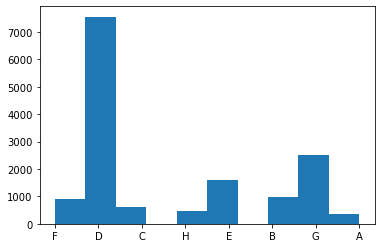

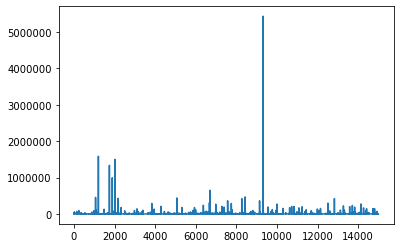

In [4]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [5]:
data_train = data_train[data_train["adview"] <2000000]

In [6]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [7]:

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [8]:

# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [9]:
#Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [33]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14636 entries, 0 to 14998
Data columns (total 7 columns):
views        14636 non-null int64
likes        14636 non-null int64
dislikes     14636 non-null int64
comment      14636 non-null int64
published    14636 non-null int32
duration     14636 non-null int64
category     14636 non-null int64
dtypes: int32(1), int64(6)
memory usage: 857.6 KB


In [10]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.1739096800320488

In [11]:
print(X_train)

[[6.27970800e-04 4.12227296e-04 1.82005703e-04 ... 5.10700797e-01
  4.25360966e-03 4.28571429e-01]
 [1.02842406e-02 3.12517617e-03 7.32067383e-03 ... 6.49181704e-01
  1.37320699e-01 8.57142857e-01]
 [1.88608556e-04 6.69428942e-05 0.00000000e+00 ... 4.05371381e-01
  4.20634733e-03 7.14285714e-01]
 ...
 [1.48331209e-03 3.03004679e-04 7.07799956e-04 ... 5.19093580e-01
  5.15159392e-03 4.28571429e-01]
 [9.86119882e-03 4.87626135e-03 1.53087019e-02 ... 9.00125892e-01
  5.67147955e-03 8.57142857e-01]
 [2.87646701e-04 4.29843847e-04 1.21337135e-04 ... 9.39991607e-02
  8.36543233e-03 4.28571429e-01]]


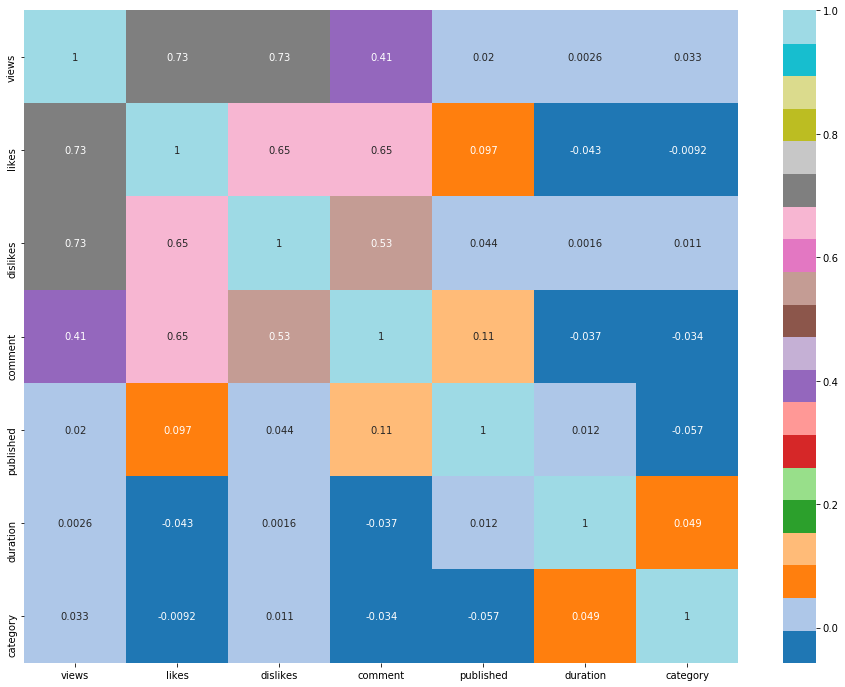

In [12]:
import seaborn as sns
cor = data_train.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, annot=True, cmap='tab20')
plt.show()

In [13]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824529
Mean Squared Error: 835663131.1210335
Root Mean Squared Error: 28907.83857573986


C:\Users\Bhagabat\Anaconda31\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824529
Mean Squared Error: 835663131.1210335
Root Mean Squared Error: 28907.83857573986


In [14]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 2600.998633879781
Mean Squared Error: 882923885.4877049
Root Mean Squared Error: 29714.035159966155


C:\Users\Bhagabat\Anaconda31\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Mean Absolute Error: 3328.9210497835033
Mean Squared Error: 650507169.8829591
Root Mean Squared Error: 25505.042048249186


In [15]:
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_test,y_test,ann)

C:\Users\Bhagabat\Anaconda31\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Bhagabat\Anaconda31\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Bhagabat\Anaconda31\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Bhagabat\Anaconda31\lib\site-packages\tensorboard\compat\tensorf

Epoch 1/100
366/366 [==============================] - 1s 916us/step - loss: 767407168.0000 - mean_squared_error: 767407168.0000
Epoch 2/100
366/366 [==============================] - 0s 851us/step - loss: 767404224.0000 - mean_squared_error: 767404224.0000
Epoch 3/100
366/366 [==============================] - 0s 935us/step - loss: 767396352.0000 - mean_squared_error: 767396352.0000
Epoch 4/100
366/366 [==============================] - 0s 770us/step - loss: 767382528.0000 - mean_squared_error: 767382528.0000
Epoch 5/100
366/366 [==============================] - 0s 763us/step - loss: 767357568.0000 - mean_squared_error: 767357568.0000
Epoch 6/100
366/366 [==============================] - 0s 768us/step - loss: 767324800.0000 - mean_squared_error: 767324800.0000
Epoch 7/100
366/366 [==============================] - 0s 754us/step - loss: 767285824.0000 - mean_squared_error: 767285824.0000
Epoch 8/100
366/366 [==============================] - 0s 754us/step - loss: 767236672.0000 - mea

366/366 [==============================] - 0s 547us/step - loss: 763905152.0000 - mean_squared_error: 763905152.0000
Epoch 65/100
366/366 [==============================] - 0s 536us/step - loss: 763896384.0000 - mean_squared_error: 763896384.0000
Epoch 66/100
366/366 [==============================] - 0s 545us/step - loss: 763889152.0000 - mean_squared_error: 763889152.0000
Epoch 67/100
366/366 [==============================] - 0s 535us/step - loss: 763882432.0000 - mean_squared_error: 763882432.0000
Epoch 68/100
366/366 [==============================] - 0s 639us/step - loss: 763875904.0000 - mean_squared_error: 763875904.0000
Epoch 69/100
366/366 [==============================] - 0s 575us/step - loss: 763867584.0000 - mean_squared_error: 763867584.0000
Epoch 70/100
366/366 [==============================] - 0s 552us/step - loss: 763860096.0000 - mean_squared_error: 763860096.0000
Epoch 71/100
366/366 [==============================] - 0s 545us/step - loss: 763855488.0000 - mean_squ

In [16]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 641us/step - loss: 763685376.0000 - mean_squared_error: 763685376.0000
Epoch 2/100
366/366 [==============================] - 0s 597us/step - loss: 763680576.0000 - mean_squared_error: 763680576.0000
Epoch 3/100
366/366 [==============================] - 0s 549us/step - loss: 763674560.0000 - mean_squared_error: 763674560.0000
Epoch 4/100
366/366 [==============================] - 0s 546us/step - loss: 763669632.0000 - mean_squared_error: 763669632.0000
Epoch 5/100
366/366 [==============================] - 0s 546us/step - loss: 763665984.0000 - mean_squared_error: 763665984.0000
Epoch 6/100
366/366 [==============================] - 0s 624us/step - loss: 763658176.0000 - mean_squared_error: 763658176.0000
Epoch 7/100
366/366 [==============================] - 0s 634us/step - loss: 763654336.0000 - mean_squared_error: 763654336.0000
Epoch 8/100
366/366 [==============================] - 0s 565us/step - loss: 763647744.0000 - mea

366/366 [==============================] - 0s 545us/step - loss: 763347776.0000 - mean_squared_error: 763347776.0000
Epoch 65/100
366/366 [==============================] - 0s 541us/step - loss: 763343168.0000 - mean_squared_error: 763343168.0000
Epoch 66/100
366/366 [==============================] - 0s 540us/step - loss: 763336128.0000 - mean_squared_error: 763336128.0000
Epoch 67/100
366/366 [==============================] - 0s 535us/step - loss: 763331520.0000 - mean_squared_error: 763331520.0000
Epoch 68/100
366/366 [==============================] - 0s 539us/step - loss: 763324992.0000 - mean_squared_error: 763324992.0000
Epoch 69/100
366/366 [==============================] - 0s 538us/step - loss: 763320064.0000 - mean_squared_error: 763320064.0000
Epoch 70/100
366/366 [==============================] - 0s 529us/step - loss: 763313472.0000 - mean_squared_error: 763313472.0000
Epoch 71/100
366/366 [==============================] - 0s 530us/step - loss: 763308864.0000 - mean_squ

In [17]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.csv")

INFO:tensorflow:Assets written to: ann_youtubeadview.csv\assets


INFO:tensorflow:Assets written to: ann_youtubeadview.csv\assets


In [18]:
data_test = pd.read_csv("test.csv")

In [19]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [20]:
from keras.models import load_model
model = load_model("ann_youtubeadview.csv")

In [21]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [22]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [23]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [24]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [25]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("test.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [26]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,2
1,1040132,8171,340,1047,1825,570,6
2,28534,31,11,1,1009,136,4
3,1316715,2284,250,274,116,262,7
4,1893173,2519,225,116,1892,31,2


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [28]:
prediction = model.predict(X_test)

In [29]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
0    8549 non-null float32
dtypes: float32(1)
memory usage: 33.5 KB


In [30]:
prediction = prediction.rename(columns={0: "Adview"})

In [31]:

prediction.head()

,Adview
0,2271.095703
1,2408.543457
2,1662.640137
3,1236.437012
4,2198.794922


In [32]:
prediction.to_csv('predictions.csv')